## Design of Experiments

This research adopted the Sliding Window Cross Validation approach for evaluating the performance of a set of forecasting methods $\mathcal{M}$ over a set of datasets $\mathcal{D}$. 

Each dataset $\mathcal{d}_j \in \mathcal{D}$ was splited in $k = 31$ overlapped data windows with $W = 2000$ samples, each one of them shifted by $I = 200$ instances from left to the right.

For each data window $\mathcal{d}_{w,j} \in \mathcal{d}_j$, where $w=1\ldots k$ and $j=1\ldots |\mathcal{D}|$, a forecasting model $\mathcal{m}_{i}^{\mathcal{d}_{w,j}}$ is trained and tested, for each forecasting method $\mathcal{m}_i \in \mathcal{M}$. The train and test subsets of $\mathcal{d}_{w,j}$ have a 80%/20% proportion.

The performance $\epsilon[m_i, d_j, w]$ of each $\mathcal{m}_{i}^{\mathcal{d}_{w,j}}$ model is evaluated using the RMSE metric using the test subset of $\mathcal{d}_{w,j}$.

## Statistical Testing

Given the mean $\mu_{m_i, d_j} = \frac{\sum_{w=1}^W \epsilon[m_i, d_j, w]}{W}$,  ANOVA aims to test the hypothesis:

* $H_0$: The $\mu_{m_i, d_j}$ means are equal 
* $H_1$: At least one $\mu_{m_i, d_j}$ mean are not equal

For the parametric ANOVA test, the F-test, some conditions must be respected:

a) The samples must be independent and equaly distributed (i.i.d)

b) The samples must be normally distributed;

c) The samples must be homoskedastic (the variances must be equal)

For the nonparametric tests there are no conditions.

When the $H_0$ is rejected it means that the samples can be not equal, and therefore we need to compare all samples against themselves. This is called *post-hoc* tests.

* $H_0$: $\mu_{m_a, d_j} < \mu_{m_b, d_j}$
* $H_1$: $\mu_{m_a, d_j}\geq \mu_{m_b, d_j}$

## Experiment Data

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('data_ht_efts.csv', sep=',')
#df.head()
pd.set_option('display.max_rows', None)
df

,ds,model,dim_fs,window,smape,rmse,mae,nrmse
0,AEC,PWMVFTS,2.0 - 10.0,0.0,14.071,47.885,31.185,0.100
1,AEC,PWMVFTS,2.0 - 10.0,657.0,15.849,38.368,26.723,0.047
2,AEC,PWMVFTS,2.0 - 10.0,1314.0,8.062,59.147,28.299,0.071
3,AEC,PWMVFTS,2.0 - 10.0,1971.0,8.408,12.472,7.109,0.125
4,AEC,PWMVFTS,2.0 - 10.0,2628.0,10.958,26.122,15.984,0.046
5,AEC,PWMVFTS,2.0 - 10.0,3285.0,9.335,21.184,17.700,0.052
6,AEC,PWMVFTS,2.0 - 10.0,3942.0,9.482,20.762,14.823,0.028
7,AEC,PWMVFTS,2.0 - 10.0,4599.0,13.978,42.727,28.411,0.064
8,AEC,PWMVFTS,2.0 - 10.0,5256.0,9.821,26.739,16.046,0.055
9,AEC,PWMVFTS,2.0 - 10.0,5913.0,10.879,25.277,29.651,0.033


In [65]:
datasets = df['ds'].unique()
datasets

array(['AEC', 'HPC30', 'KSH10'], dtype=object)

In [66]:
methods = df['model'].unique()
# methods = ['KFTS', 'PFTS', 'RF', 'GRU', 'RNN', 'LSTM', 'SLSTM', 'SLSTM2', 'SVR']
#methods = ['KFTS', 'PFTS', 'RF', 'GRU', 'RNN', 'LSTM', 'SLSTM', 'SVR']
#methods = ['PWMVFTS', 'AWMVFTS', 'PSARIMAX', 'SARIMAX', 'NAIVE', 'LSTM', 'GRU', ]
list(methods)

['PWMVFTS', 'AWMVFTS']

## Experiment Histograms

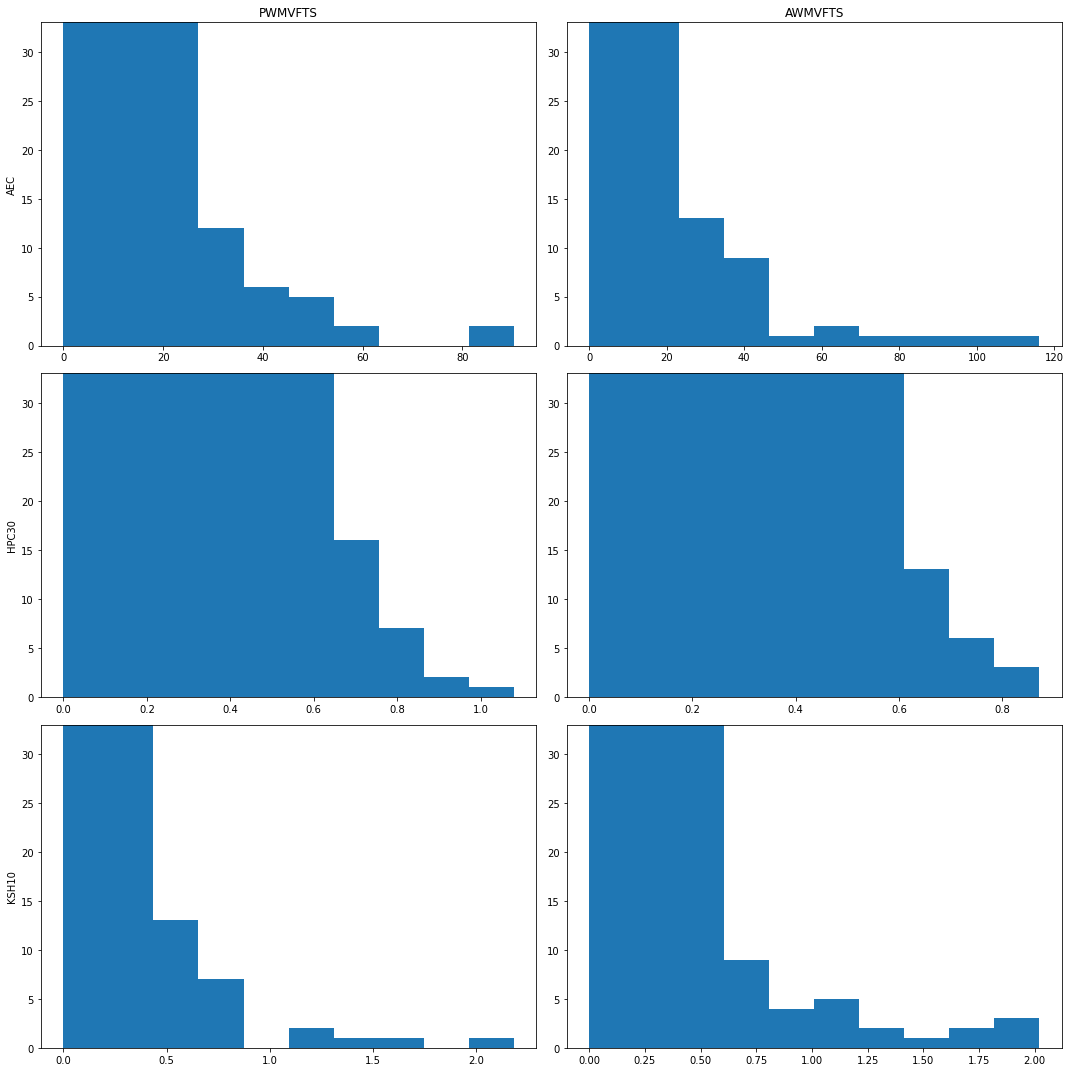

In [83]:
datasets2 = list(datasets)#['AEC', 'KSH', 'AQI', 'AQB1', 'AQB6', 'AQB12']

#datasets2 = ['AQI', 'AQB1', 'AQB6', 'AQB12']

methods2 = list(methods) #['KFTS', 'PFTS', 'VAR', 'SLSTM', 'LSTM', 'GRU', 'RNN', 'RF', 'SVR']

num_rows = len(datasets2)
num_cols = len(methods2)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for count1, dataset in enumerate(datasets2):

  for count2, method in enumerate(methods2):
    tmp = df[(df['ds'] == dataset) & (df['model'] == method)]['rmse']

    ax[count1][count2].hist(tmp)

    ax[count1][count2].set_ylim([0, 33])

    if count2 == 0:
      ax[count1][count2].set_ylabel(dataset)
    
    if count1 == 0:
      ax[count1][count2].set_title(method)

plt.tight_layout()


## Hypothesis Test

- Mann–Whitney U test
- Post Hoc: Wilcoxon

$\alpha = .01$

In [163]:
from scipy import stats
import itertools

posthoc_result = {
    "dataset": [],
    "methods": [],
    "statistic": [],
    "pvalue": [],
    "result": []
}

competing_methods = list(methods)#['KFTS', 'PFTS', 'VAR', 'SLSTM', 'LSTM', 'GRU', 'RNN', 'RF', 'SVR']
print(list(methods))

alpha = 0.01
metric = 'rmse'

#stats.mannwhitneyu
anova_test = stats.wilcoxon #stats.friedmanchisquare #stats.kruskal 
#post_hoc_test = stats.mannwhitneyu

for dataset in datasets:
    sample1 = df[(df['ds'] == dataset) & (df['model'] == methods[0])][metric]
    sample2 = df[(df['ds'] == dataset) & (df['model'] == methods[1])][metric]
        
    #result = post_hoc_test(sample1,sample2,alternative='two-sided') 
    result = post_hoc_test(sample1,sample2,alternative='greater') 

    if result.pvalue > alpha:
        test = 'Fail to Reject H0'
    else:
        test = 'H0 rejected'

    print('\t Wilcoxon {} x {} = {}, {}'.format(a,b,result, test))
          
    posthoc_result["dataset"].append(dataset)
    posthoc_result["methods"].append(a + " x " + b)
    posthoc_result["statistic"].append(result.statistic)
    posthoc_result["pvalue"].append(result.pvalue)
    posthoc_result["result"].append(test)

    print("")

['PWMVFTS', 'AWMVFTS']
	 Wilcoxon PWMVFTS x AWMVFTS = MannwhitneyuResult(statistic=209637.0, pvalue=2.6589172587118987e-07), H0 rejected

	 Wilcoxon PWMVFTS x AWMVFTS = MannwhitneyuResult(statistic=212755.5, pvalue=2.4188026787977317e-08), H0 rejected

	 Wilcoxon PWMVFTS x AWMVFTS = MannwhitneyuResult(statistic=113873.0, pvalue=1.0), Fail to Reject H0



In [164]:
df_posthoc_result = pd.DataFrame(posthoc_result)
df_posthoc_result

,dataset,methods,statistic,pvalue,result
0,AEC,PWMVFTS x AWMVFTS,209637.0,2.658917e-07,H0 rejected
1,HPC30,PWMVFTS x AWMVFTS,212755.5,2.418803e-08,H0 rejected
2,KSH10,PWMVFTS x AWMVFTS,113873.0,1.000000e+00,Fail to Reject H0


In [165]:
df_posthoc_result.to_csv(r'final_efts.csv', index = False, header=True)

In [94]:
# from scipy import stats
# import itertools

# anova_result = {
#     "dataset": [],
#     "statistic": [],
#     "pvalue": [],
#     "result": []
# }

# posthoc_result = {
#     "dataset": [],
#     "methods": [],
#     "statistic": [],
#     "pvalue": [],
#     "result": []
# }

# competing_methods = list(methods)#['KFTS', 'PFTS', 'VAR', 'SLSTM', 'LSTM', 'GRU', 'RNN', 'RF', 'SVR']
# print(list(methods))

# alpha = 0.01

# #stats.mannwhitneyu
# anova_test = stats.wilcoxon #stats.friedmanchisquare #stats.kruskal 
# post_hoc_test = stats.wilcoxon

# for dataset in datasets:
#     samples = []
#     for method in competing_methods:
#       sample = df[(df['ds'] == dataset) & (df['model'] == method)]['rmse']
#       #print(sample)
#       samples.append(sample)

#     #result = anova_test(*samples)

# #     if result.pvalue < alpha:
# #       test = 'H0 rejected' #different 
# #     else:
# #       test = 'Fail to Reject H0' # equal 

# #     print('Wilcoxon test {} result: {}, {}'.format(dataset, result, test))
    
# #     anova_result["dataset"].append(dataset)
# #     anova_result["statistic"].append(result.statistic)
# #     anova_result["pvalue"].append(result.pvalue)
# #     anova_result["result"].append(test)

# #     if result.pvalue < alpha:
#       for a,b in itertools.product(competing_methods , competing_methods):
#         if a != b:
#           i = competing_methods.index(a)
#           j = competing_methods.index(b)
#           result2 = post_hoc_test(samples[i],samples[j],alternative='greater') 

#           if result2.pvalue > alpha:
#             test = 'Fail to Reject H0'
#           else:
#             test = 'H0 rejected'

#           print('\t Wilcoxon {} x {} = {}, {}'.format(a,b,result2, test))
          
#           posthoc_result["dataset"].append(dataset)
#           posthoc_result["methods"].append(a + " x " + b)
#           posthoc_result["statistic"].append(result2.statistic)
#           posthoc_result["pvalue"].append(result2.pvalue)
#           posthoc_result["result"].append(test)

#     print("")

In [87]:
competing_methods

['PWMVFTS', 'AWMVFTS']

In [82]:
df_anova_result = pd.DataFrame(anova_result)
df_anova_result

,dataset,statistic,pvalue,result
0,AEC,48865.0,2.790144e-02,Fail to Reject H0
1,HPC30,88231.5,8.637849e-01,Fail to Reject H0
2,KSH10,3248.0,5.158845e-93,H0 rejected


In [49]:
df_anova_result.to_csv(r'final_efts.csv', index = False, header=True)

In [34]:
print(len(posthoc_result['dataset']))
print(len(posthoc_result['methods']))

4
4


In [35]:
df_posthoc_result = pd.DataFrame(posthoc_result, columns=list(posthoc_result.keys()))
df_posthoc_result

,dataset,methods,statistic,pvalue,result
0,AEC,PWMVFTS x AWMVFTS,61820.0,1.395072e-02,Fail to Reject H0
1,AEC,AWMVFTS x PWMVFTS,48865.0,9.860493e-01,Fail to Reject H0
2,KSH10,PWMVFTS x AWMVFTS,3248.0,1.000000e+00,Fail to Reject H0
3,KSH10,AWMVFTS x PWMVFTS,177052.0,2.579423e-93,H0 rejected


### Rankings

In [14]:
from scipy import stats
import itertools

competing_methods = list(methods)#['KFTS', 'PFTS', 'VAR', 'SLSTM', 'LSTM', 'GRU', 'RNN', 'RF', 'SVR']

anova_test = stats.kruskal #stats.friedmanchisquare #stats.kruskal #stats.friedmanchisquare
post_hoc_test = stats.wilcoxon

final_ranking = []

for dataset in datasets:
  #if dataset != 'SONDA':
    samples = []
    for method in competing_methods:
      sample = df[(df['ds'] == dataset) & (df['model'] == method)]['rmse']
      samples.append(sample)

    result = anova_test(*samples)

    if result.pvalue < alpha:
      
      post_hoc = {k: 0 for k in competing_methods}
      
      for a,b in itertools.product(competing_methods , competing_methods):
        if a != b:
          i = competing_methods.index(a)
          j = competing_methods.index(b)
          result2 = post_hoc_test(samples[i],samples[j],alternative='greater') 

          if result2.pvalue > alpha:
            post_hoc[a] += 1
      
      print(post_hoc)
      ranking = [len(methods) - v for v in post_hoc.values()]

      ranking.insert(0, dataset)

      final_ranking.append(ranking)


columns = competing_methods.copy()

columns.insert(0,'Dataset')

df_final_ranking = pd.DataFrame(final_ranking, columns=columns) 

#print("")
df_final_ranking

{'PWMVFTS': 0, 'AWMVFTS': 1}
{'PWMVFTS': 0, 'AWMVFTS': 1}
{'PWMVFTS': 1, 'AWMVFTS': 0}


,Dataset,PWMVFTS,AWMVFTS
0,AEC,2,1
1,HPC30,2,1
2,KSH10,1,2


In [15]:
#df_final_ranking.T
df_final_ranking = df_final_ranking.transpose()
df_final_ranking

,0,1,2
Dataset,AEC,HPC30,KSH10
PWMVFTS,2,2,1
AWMVFTS,1,1,2


In [104]:
df_final_ranking.to_csv(r'final_ranking_miso.csv', index = False, header=True)

In [26]:
#post_hoc.values()